In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('nadia_morad.jpeg')
denis = cv2.imread('Denis_Mukwge.jpg')

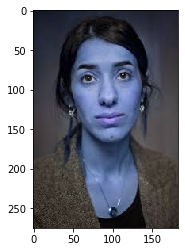

In [3]:
plt.imshow(nadia,cmap='gray')

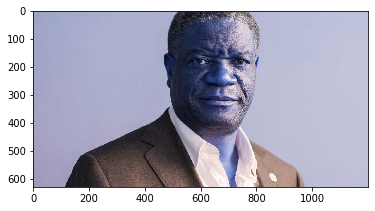

In [4]:
plt.imshow(denis,cmap='gray')

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [6]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),1)
    return face_img

In [7]:
result = detect_face(nadia)

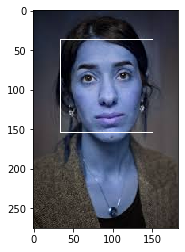

In [8]:
plt.imshow(result,cmap='gray')

In [9]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img

In [10]:
result = adj_detect_face(nadia)

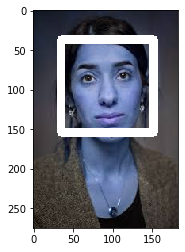

In [11]:
plt.imshow(result,cmap='gray')

In [12]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [13]:
def detect_eyes(img):
    face_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(face_img)
    for(x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img

In [14]:
result = detect_eyes(nadia)

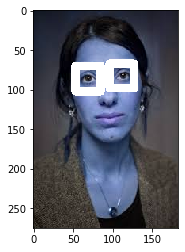

In [15]:
plt.imshow(result)

In [16]:
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('video Face Detect',frame)
    k = cv2.waitKey(1)
    if k == 27 :
        break
cap.release()
cv2.destroyAllWindows()